### Import Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw= pd.read_csv('Data-Collisions.csv')

C:\Users\XiXi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Cleaning

In [2]:
# Select Columns needed for analysis
df = raw[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

# Dealing with missing data
df.replace('?',np.nan, inplace=True)

missing=df.isnull()

for column in missing.columns.values.tolist():
    print(column)
    print(missing[column].value_counts())
    print("")

# we can drop the rows with NAN value because it only consists of less than 4% of our data

C:\Users\XiXi\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64



In [3]:
df.dropna(subset=['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'],axis=0,inplace=True)

C:\Users\XiXi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print("")


SEVERITYCODE
1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

WEATHER
Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

ROADCOND
Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                

## Balancing the dataset


In [5]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE == 2]
resample_df = resample(df_maj,replace=False,n_samples=56883,random_state=123)

new_df = pd.concat([resample_df,df_min])
new_df.SEVERITYCODE.value_counts()

2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

## VALUE COUNTS


In [6]:
for column in new_df.columns.values.tolist():
    print(column)
    print(new_df[column].value_counts())
    print("")


SEVERITYCODE
2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           70332
Intersection    43062
Alley             372
Name: ADDRTYPE, dtype: int64

WEATHER
Clear                       68126
Raining                     20696
Overcast                    16907
Unknown                      6660
Snowing                       488
Other                         418
Fog/Smog/Smoke                364
Sleet/Hail/Freezing Rain       65
Blowing Sand/Dirt              23
Severe Crosswind               16
Partly Cloudy                   3
Name: WEATHER, dtype: int64

ROADCOND
Dry               76243
Wet               29541
Unknown            6580
Ice                 658
Snow/Slush          513
Other                80
Standing Water       68
Sand/Mud/Dirt        49
Oil                  34
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    71766
Dark - Street Lights On     29238
Unknown                      5936
Dusk                         3618
Dawn          

### Preprocessing the data
Replace Catergorical values to numeric values

In [7]:
new_df['ADDRTYPE'].replace(to_replace=['Block',
                                       'Intersection',
                                       'Alley'],value=[1,2,3],inplace=True)
new_df['WEATHER'].replace(to_replace=['Clear',
                                      'Raining',
                                      'Overcast',
                                      'Partly Cloudy',
                                      'Snowing', 
                                      'Fog/Smog/Smoke',
                                      'Sleet/Hail/Freezing Rain',
                                      'Blowing Sand/Dirt',
                                      'Severe Crosswind',
                                      'Other','Unknown'],value=[1,2,3,3,4,5,6,7,8,9,10],inplace=True)
new_df['ROADCOND'].replace(to_replace=['Dry',
                                       'Sand/Mud/Dirt',
                                       'Wet','Standing Water',
                                       'Ice','Snow/Slush',
                                       'Other','Oil','Unknown'],value=[1,1,2,2,3,4,5,5,6],inplace=True)
new_df['LIGHTCOND'].replace(to_replace=['Daylight',
                                        'Dark - Street Lights On',
                                        'Dark - No Street Lights',
                                        'Dark - Street Lights Off',
                                        'Dusk','Dawn',
                                        'Other','Unknown',
                                        'Dark - Unknown Lighting'],value=[1,2,3,3,4,5,6,7,7],inplace=True)


In [8]:
for column in new_df.columns.values.tolist():
    print(column)
    print(new_df[column].value_counts())
    print("")

SEVERITYCODE
2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
1    70332
2    43062
3      372
Name: ADDRTYPE, dtype: int64

WEATHER
1     68126
2     20696
3     16910
10     6660
4       488
9       418
5       364
6        65
7        23
8        16
Name: WEATHER, dtype: int64

ROADCOND
1    76292
2    29609
6     6580
3      658
4      513
5      114
Name: ROADCOND, dtype: int64

LIGHTCOND
1    71766
2    29238
7     5944
4     3618
5     1564
3     1520
6      116
Name: LIGHTCOND, dtype: int64

SPEEDING
Y    5992
Name: SPEEDING, dtype: int64



## Feature Selection

In [9]:
# SPEEDING is not included due to limited data points
x = new_df[['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]
y = new_df['SEVERITYCODE']


Preprocessing

In [10]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

Split the data

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

## Machine Learning

In [12]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=18).fit(x_train,y_train)
yhat_knn = KNN.predict(x_test)


In [14]:
from sklearn import metrics

metrics.accuracy_score(y_test,yhat_knn)


0.5973894699832997

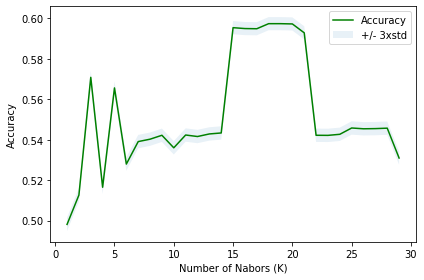

The best k= 18


In [15]:
# Find the best value for k 
Ks=30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range (1, Ks):
    KNN = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_knn = KNN.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
mean_acc

# visualize k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.1)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print('The best k=',mean_acc.argmax()+1)

In [15]:
# Jaccard_similarity Score
KNN_J = jaccard_similarity_score(y_test,yhat_knn)
KNN_f1 = f1_score(y_test,yhat_knn,average='weighted')

print('Jaccard Score=',KNN_J)
print('f1=',KNN_f1)

Jaccard Score= 0.5973894699832997
f1= 0.5923219328380459


C:\Users\XiXi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',max_depth=None)
DT.fit(x_train,y_train)
yhat_DT= DT.predict(x_test)
yhat_DT

array([2, 1, 2, ..., 1, 2, 2], dtype=int64)

In [17]:
# Jaccard_similarity Score
DT_J = jaccard_similarity_score(y_test,yhat_DT)

# F1
DT_f1 = f1_score(y_test,yhat_DT,average='weighted')

print('Jaccard Score=',DT_J)
print('f1=',DT_f1)

Jaccard Score= 0.6002900588907445
f1= 0.5936774839746147


C:\Users\XiXi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## SVM

In [18]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)

yhat_svm=clf.predict(x_test)


In [19]:
# Jaccard_similarity Score
SVM_J = jaccard_similarity_score(y_test,yhat_svm)

# F1
SVM_f1 = f1_score(y_test,yhat_svm,average='weighted')

print('Jaccard Score=',SVM_J)
print('f1=',SVM_f1)

Jaccard Score= 0.6014766634437901
f1= 0.5946649034817163


C:\Users\XiXi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver = 'liblinear')
LR.fit(x_train,y_train)
yhat_LR=LR.predict(x_test)

yhat_prob = LR.predict_proba(x_test)


In [21]:
# Jaccard_similarity Score
LR_J = jaccard_similarity_score(y_test,yhat_LR)

# F1
LR_f1 = f1_score(y_test,yhat_LR,average='weighted')

# LogLoss
LR_LogLoss=log_loss(y_test, yhat_prob)

print('Jaccard Score=',LR_J)
print('f1=',LR_f1)
print('LogLoss=',LR_LogLoss)

Jaccard Score= 0.598839764437022
f1= 0.5915895936596657
LogLoss= 0.6560093562217645


C:\Users\XiXi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [22]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### KNN Matrix

              precision    recall  f1-score   support

           1       0.58      0.71      0.64     11326
           2       0.63      0.49      0.55     11428

    accuracy                           0.60     22754
   macro avg       0.60      0.60      0.59     22754
weighted avg       0.60      0.60      0.59     22754

Confusion matrix, without normalization
[[8040 3286]
 [5875 5553]]


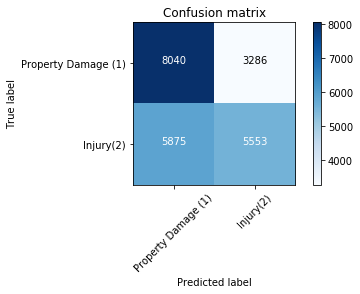

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

### Decision Tree Matrix

              precision    recall  f1-score   support

           1       0.58      0.73      0.64     11326
           2       0.64      0.47      0.54     11428

    accuracy                           0.60     22754
   macro avg       0.61      0.60      0.59     22754
weighted avg       0.61      0.60      0.59     22754

Confusion matrix, without normalization
[[8256 3070]
 [6025 5403]]


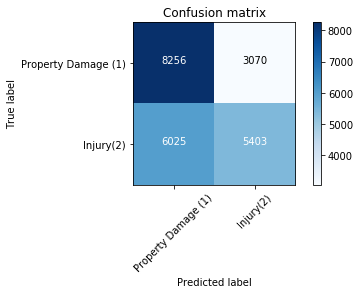

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

### SVM Matrix


              precision    recall  f1-score   support

           1       0.58      0.73      0.65     11326
           2       0.64      0.47      0.54     11428

    accuracy                           0.60     22754
   macro avg       0.61      0.60      0.59     22754
weighted avg       0.61      0.60      0.59     22754

Confusion matrix, without normalization
[[8293 3033]
 [6035 5393]]


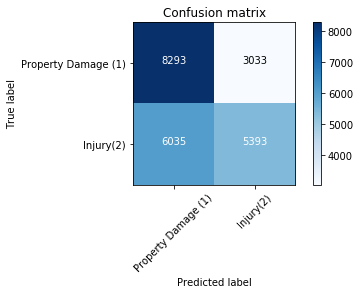

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

### Logistic Regression

              precision    recall  f1-score   support

           1       0.58      0.73      0.65     11326
           2       0.64      0.47      0.54     11428

    accuracy                           0.60     22754
   macro avg       0.61      0.60      0.59     22754
weighted avg       0.61      0.60      0.59     22754

Confusion matrix, without normalization
[[8304 3022]
 [6106 5322]]


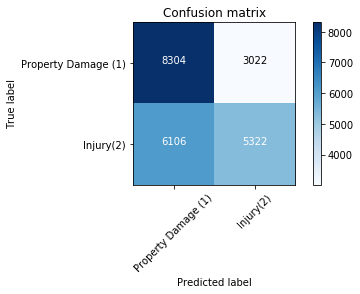

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')